# MACHINE LEARNING - REGRESSION ANALYSIS

Hi everyone, I am Abisoye Abidakun I will be analyzing the data on the energy efficiency of buildings. I will be doing a comprehensive analysis of the lesson notes and code (1-5) but with a little bit of twicks and modifications to the codes during the course of my analysis. 

- Special thanks to Adedayo for the heads up and guide: I honestly won't have been able to structure my thoughts so fast.



# Importing the Data and required packages that will be used. 

In [1]:
import numpy as np 
import pandas as pd # data processing,
# for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
# to give the graphs a little bit of aesthetics and size the graphs
sns.despine() 

plt.rc('figure', figsize=(20,10)) 

C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\abiso\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<Figure size 432x288 with 0 Axes>

# Task 1 Simple Linear Regression 

In line with the Paris Agreement COP21 Global goal of reducing the CO2 emission by 1.5 degree celcius, various business and sector have been looking towards efficient energy utilisation and consumption to reduce the carbon footprint and also become more cost and energy efficient. With a significant percentage of energy being consumed by for heating buildings, a step towards efficiency will be to construct energy efficient buildings. 
To achieve this, it is imperative to understand the energy efficiency of buildings utilizing by analyzing building design data and how they impact the energy efficiency of buildings in terms of heating. 
We will use this case study to understand:

- linear regression and the various characteristics
- the assumptions underlining linear regression
- multiple linear regression, partial least squares and penalizations.
- And other topics such as feature selection and scaling. 
- Model Parameter tuning for optimizing model performance. 

Basically on the heating load and the cooling load data for 768 different residential buildings with various shapes and sizes with features such as the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. 

## Data Source: 
 UCI Machine Learning Repository: Energy efficiency Data Set 
 
## Linear Regression

Regression analysis is one of the most widely used methods for prediction. Linear regression is probably the most
fundamental machine learning method out there and a starting point for the advanced analytical learning path of
every aspiring data scientist.

A linear regression is a linear approximation of a causal relationship between two or more variables.
Regression models are highly valuable, as they are one of the most common ways to make inferences and
predictions. Apart from this, regression analysis is also employed to determine and assess factors that affect a
certain outcome in a meaningful way.

As many other statistical techniques, regression models help us make predictions about the population based on
sample data.

- Get Sample Data
- Design Models
- Make Predictions about the whole population

# Loading Data and EDA

In [2]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


data = data.rename(columns=column_names)
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.describe(include='all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Understanding Simple Linear Regression using a Simple Univariate Model

First Understand the correlation between models and We will be using two approaches to understand the Linear Regression Model:

- Statsmodels
- Sklearn

In [5]:
# Correlations amogst the independent variables with the Heating Load

sample_corr =(data.corr()["Heating_Load"].sort_values(ascending = True))
print(sample_corr)

Roof_Area                   -0.861828
Surface_Area                -0.658120
Orientation                 -0.002587
Glazing_Area_Distribution    0.087368
Glazing_Area                 0.269842
Wall_Area                    0.455671
Relative_Compactness         0.622272
Overall_Height               0.889430
Cooling_Load                 0.975862
Heating_Load                 1.000000
Name: Heating_Load, dtype: float64


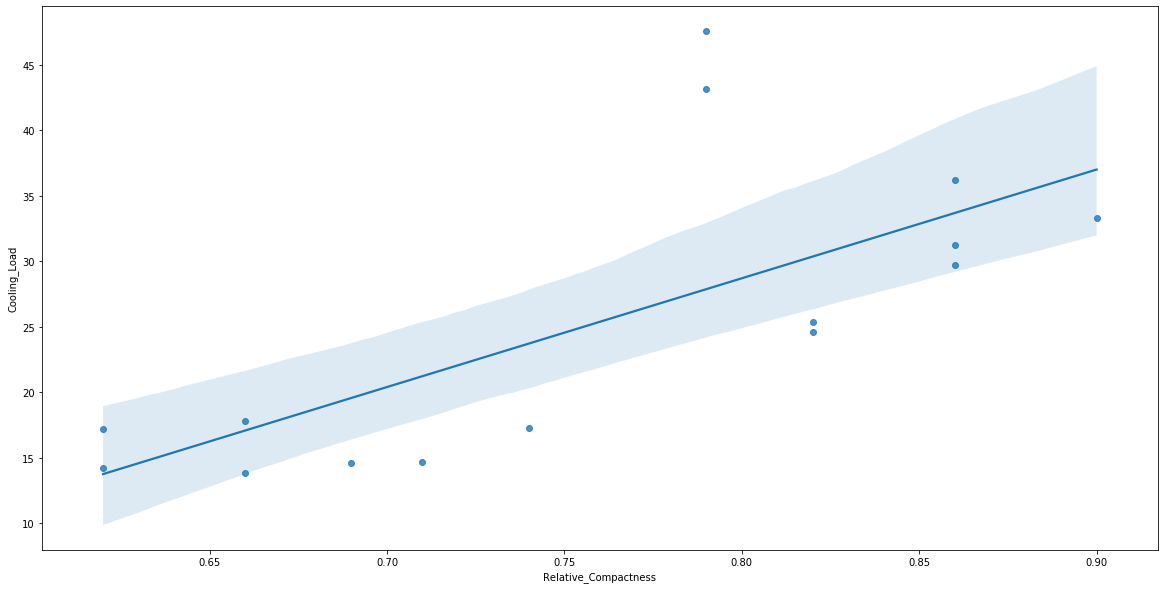

In [6]:
#select a sample of the dataset
simple_linear_reg_df = data[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

## Observation

The above shows a high correlation between dependent variable - Cooling Load and the Independent Variable -  Relative Compactness. With these two variables, we will be doing a simple case study of the Linear Regression Model

In [7]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['Cooling_Load']
# Similarly, our independent variable (x) is the SAT score
x1 = data['Relative_Compactness']

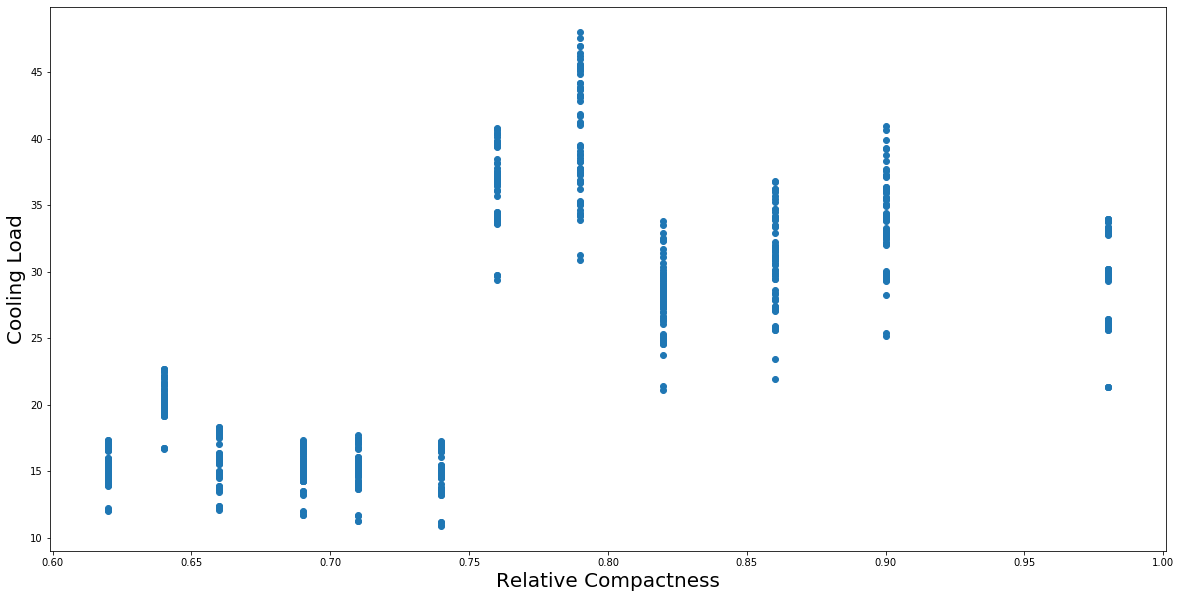

In [8]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('Relative Compactness', fontsize = 20)
plt.ylabel('Cooling Load', fontsize = 20)
# Show the plot
plt.show()

## Regression itself

In [9]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cooling_Load   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     515.8
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           1.06e-87
Time:                        01:11:54   Log-Likelihood:                -2621.6
No. Observations:                 768   AIC:                             5247.
Df Residuals:                     766   BIC:                             5257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -19.0084      1.938     -9.809      0.000     -22.813     -15.204
Relative_Compactness    57.0505      2.512     22.710      0.000      52.119      61.982
==============================================================================
Omnibus:                       68.520   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.329
Skew:                           0.810   Prob(JB):                     2.96e-19
Kurtosis:                       3.207   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Highlights of the Parameters in  Summary Table provided by the OLS 

- R-Squared: Explains the variability of the data, explained by the regression model Range[0:1], 0.402 indicates that 40.2% of the variability of the data is explained by the model. 


- Adjusted R-Squared: Variability of the data, explained by the regression model, considering the number of independent variables Range: <1; could be negative, but a negative number is interpreted as 0. However, because the model is univariate its equal to the R-Squared. 


- Dep. Variable: The dependent variable, y; This is the variable we are trying to predict.


- P-value for F-statistic: F-statistic evaluates the overall significance of the model (if at least 1 predictor is significant, F-statistic is also significant). With a p-value less than 5% indicating that the at least 1 variable is significant. In our example above, p-value = 1.06e-87 which indicate significance. 


- P-valueof t-statistic: The t-statistic of a coefficient shows if the corresponding independent variable is significant or not. Also, a p-value less than 5% indicating that the independent/explanatory variable is significant. In our example above, p-value = 0.00 which indicate significance.


- Coefficient of the intercept: b0 (-19.0084)sometimes we refer to this variable as constant or bias (as it ‘corrects’ the regression equation with a constant value)


- Coefficient of the independent variable bi;(57.0505)this is usually the most important metric – it shows us the relative/absolute contribution of each independent variable of our model


Other paramters will be considered as we go further with the analysis of the simple linear regressions

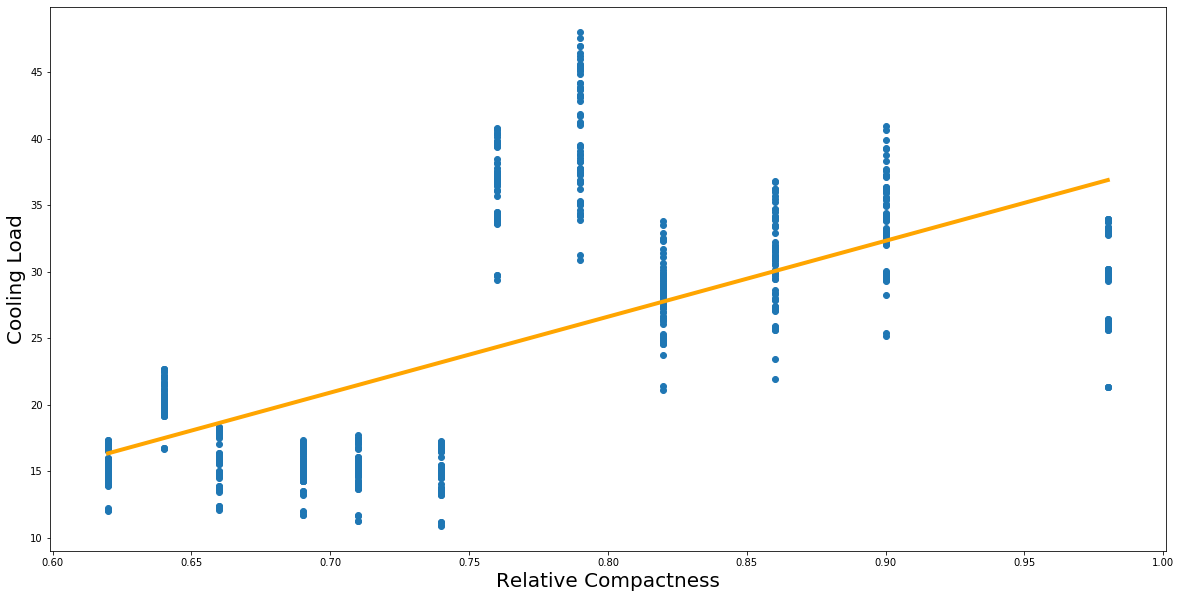

In [10]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 57.0505*x1 + (-19.0084)
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Relative Compactness', fontsize = 20)
plt.ylabel('Cooling Load', fontsize = 20)
plt.show()

In [11]:
new_data = pd.DataFrame({'const':1,'Relative_Compactness':simple_linear_reg_df['Relative_Compactness']})

In [12]:
new_data.head()

,const,Relative_Compactness
158,1,0.82
251,1,0.86
631,1,0.90
757,1,0.66
689,1,0.79


In [13]:
# Use the predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions

158    27.773082
251    30.055103
631    32.337124
757    18.644997
689    26.061566
573    16.362975
553    23.209039
728    30.055103
183    18.644997
515    20.356513
460    21.497523
143    16.362975
258    26.061566
682    30.055103
62     27.773082
dtype: float64

In [14]:
# If we want we can create a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
joined = new_data.join(predictionsdf)
# Rename the indices as before (not a good practice in general) 


In [15]:
joined

,const,Relative_Compactness,Predictions
158,1,0.82,27.773082
251,1,0.86,30.055103
631,1,0.90,32.337124
757,1,0.66,18.644997
689,1,0.79,26.061566
573,1,0.62,16.362975
553,1,0.74,23.209039
728,1,0.86,30.055103
183,1,0.66,18.644997
515,1,0.69,20.356513


# Using Scikit Learn for the Linear Regression Model

In [16]:
# IMPORITNG THE REQUIRED SKLEARN LIBRARY
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LinearRegression #the model used, it is used for single and multivaraiate

X =  data[['Relative_Compactness']] #chosen predictor
y=  data[['Cooling_Load']] #target variable, you can set multiple predictors or target varaiables

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

lR = LinearRegression().fit(X_train, y_train)

lR_pred= lR.predict(X_test) # the predicted vriable

Text(0, 0.5, 'Predicted Values')

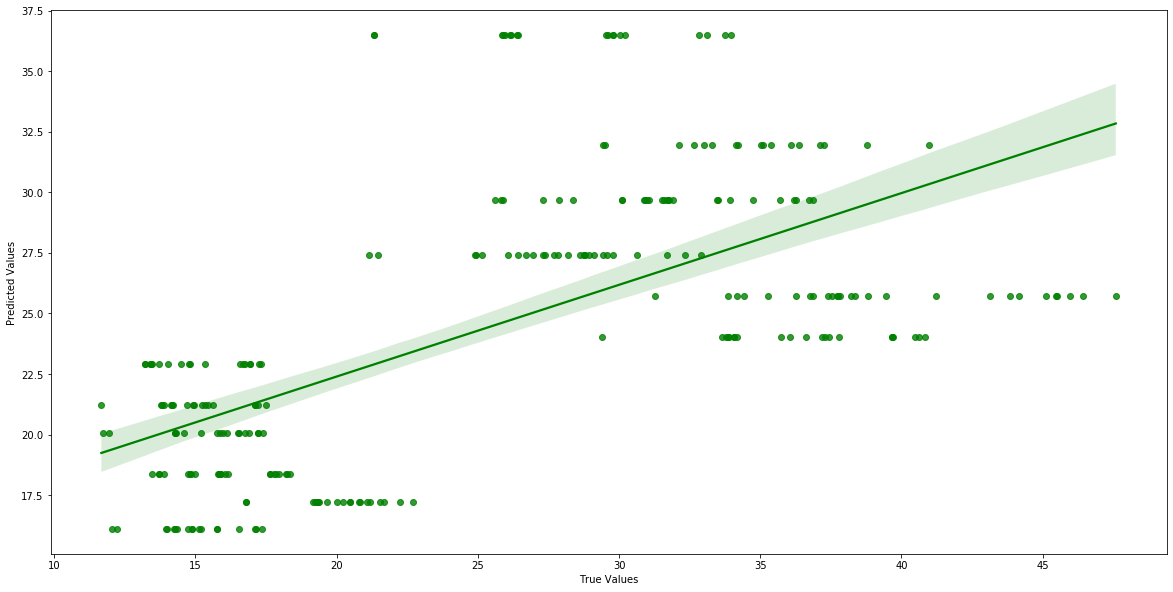

In [79]:
# Plot outputs
sns.regplot(x= y_test,y=lR_pred,color='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#this graph shows the errors in our simple linear relationship

# MULTIPLE LINEAR REGRESSIONS AND ASSUMPTIONS 



We will be combining multiple linear regression with testing the assumptions. I have abstracted the assumption into various functions to  view them independently using the training model.

Additionally, a few of the tests use residuals, so we’ll write a quick function to calculate residuals (to adhere to DRY coding practice for the individual tests that use residuals).

We will also be extracting the data and splitting them out into target varaibles(y) and explanatory variables (x1,x2,x3.....)

Artificial linear data using the same number of features and observations as the Energy Efficiency dataset for assumption test comparison.




In [29]:
# Generating the artificial data for testing the assumptions
from sklearn.datasets import make_regression
linear_X, linear_y = make_regression(n_samples=768,
                                              n_features=8,
                                              noise=75, random_state=40)


In [26]:
# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [27]:
#Splitting the data into target and explanatory variables 
data1=data.drop(["Cooling_Load","Heating_Load"],axis=1)
target1 = data["Cooling_Load"]
target2 = data["Heating_Load"]


In [28]:
# Fitting the model
energy_model = LinearRegression()
energy_model.fit(data1,target1)

# Returning the R^2 for the model
energy_r2 = energy_model.score(data1, target1)
print('R^2: {0}'.format(energy_r2))

R^2: 0.8877069752284719


## Observation
- The model explains about 89% of the variation of the data 

In [30]:
# Fitting the model
dummy_model = LinearRegression()
dummy_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
dummy_r2 = dummy_model.score(linear_X, linear_y)
print('R^2: {0}'.format(dummy_r2))

R^2: 0.7598970045347426


In [31]:
# Function for calculating residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

## I) Linearity
This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.

- Why it can happen: There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

- What it will affect: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

- How to detect it: If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.

- How to fix it: Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label

In [32]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


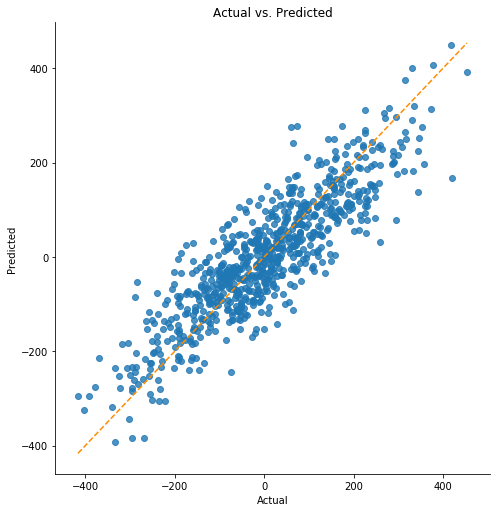

In [33]:
linear_assumption(dummy_model, linear_X, linear_y)

## Observation 
- It is obvious that the relationship is linear as the predicted values spreads evenly around the diagonal.

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\abiso\Anaconda\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


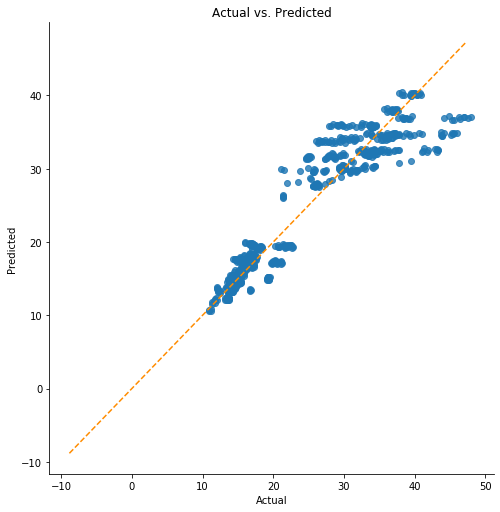

In [34]:
linear_assumption(energy_model, data1, target1)

## Observation
We can see that the observations are linear but in two clusters.

- The lower cluster (10 -20) being more linear than the higher cluster (25 -42)


Text(0, 0.5, 'Predicted Values')

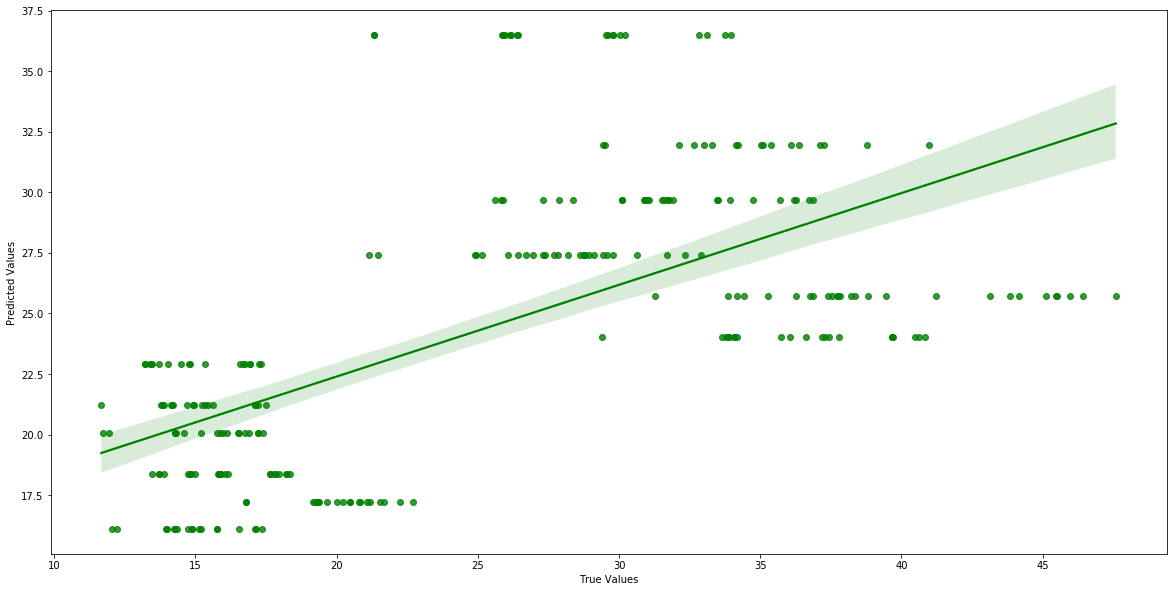

In [80]:
# Plot outputs
sns.regplot(x= y_test,y=lR_pred,color='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#this graph shows the errors in our simple linear relationship

Another evidence of Linearity 

## II) Normality of the Error Terms
More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

 - Why it can happen: This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

- What it will affect: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

- How to detect it: There are a variety of ways to do so, but we’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.

- How to fix it: It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.

In [35]:
def normality_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.06689514524135327
Residuals are normally distributed


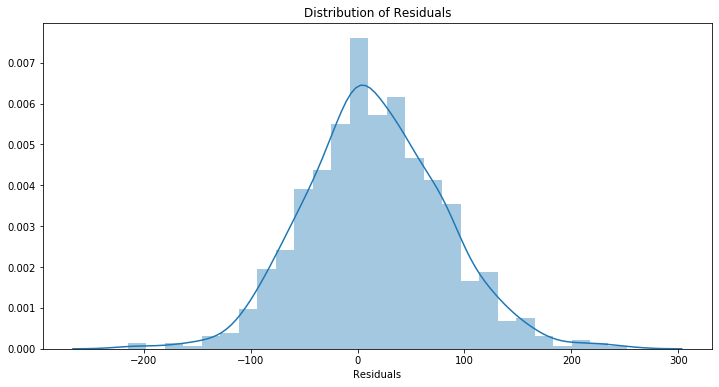


Assumption satisfied


In [36]:
normality_errors_assumption(dummy_model, linear_X, linear_y)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


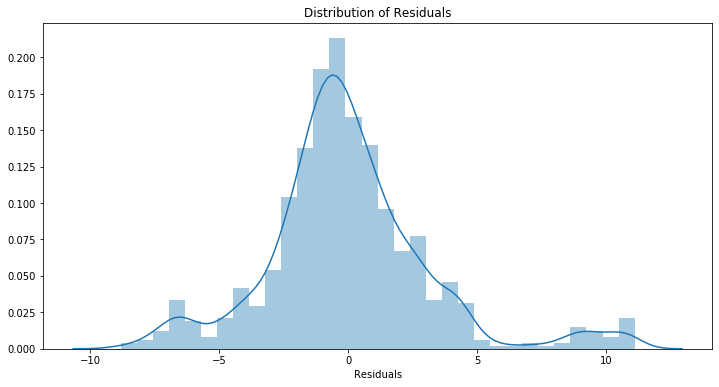


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [37]:
normality_errors_assumption(energy_model, data1, target1)

## Observation:

- It will be good to keep this in mind for future reference as it would be required to transform/standardize the data in order to attain normality of the residuals and eliminate the impact on the confidence interval and predictions

## III) No Multicollinearity among Predictors
This assumes that the predictors used in the regression are not correlated with each other. This won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

- Why it can happen: A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.

- What it will affect: Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

- How to detect it: There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).

- How to fix it: This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.


Variance Inflation Factor

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. 

or

VIF score of an independent variable represents how well the variable is explained by other independent variables

$$ V.I.F. = 1 / (1 - R^2). $$

In [70]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
    
    # Gathering the VIF for each variable
    if type(features).__module__ == np.__name__:
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))
    else:
        VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(features.columns[idx], vif))
    
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


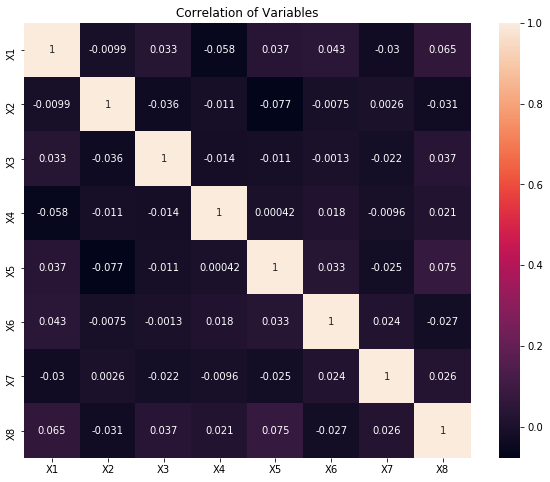

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 1.0128134725758606
X2: 1.0079424617935222
X3: 1.0045370743931032
X4: 1.0049664124440294
X5: 1.014430869594604
X6: 1.0050932809436917
X7: 1.00380616585871
X8: 1.0141097224491769

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [71]:
multicollinearity_assumption(dummy_model, linear_X, linear_y, linear_feature_names)

Assumption 3: Little to no multicollinearity among predictors


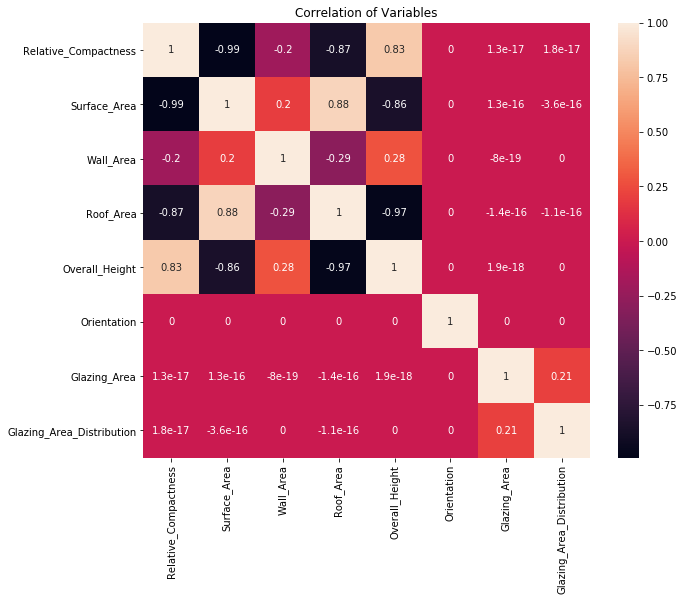

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Relative_Compactness: 168.94875143200792
Surface_Area: inf
Wall_Area: inf
Roof_Area: inf
Overall_Height: 134.0357820677755
Orientation: 10.796724628195735
Glazing_Area: 4.293656134090348
Glazing_Area_Distribution: 4.4963195038380634

6 cases of possible multicollinearity
5 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [72]:
multicollinearity_assumption(energy_model, data1, target1)

## IV) No Autocorrelation of the Error Terms

This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

- Why it can happen: In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

- What it will affect: This will impact our model estimates.

- How to detect it: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.

- How to fix it: A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

In [73]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [74]:
autocorrelation_assumption(dummy_model, linear_X, linear_y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9759681201742714
Little to no autocorrelation 

Assumption satisfied


In [75]:
autocorrelation_assumption(energy_model, data1,target1)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.092436203929949
Signs of positive autocorrelation 

Assumption not satisfied


We’re having signs of positive autocorrelation here, which is likely due to the high multicollinearity(Guessing!) and our linearity assumption is being violated. Since this isn’t a time series dataset, lag variables aren’t possible. Instead, we should look into either interaction terms or additional transformations.

## V) Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

- Why it can happen: Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

- What it will affect: Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

- How to detect it: Plot the residuals and see if the variance appears to be uniform.

- How to fix it: Heteroscedasticity can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

In [76]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


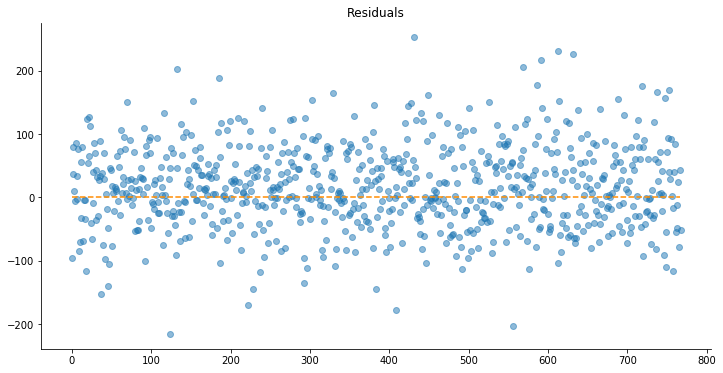

In [77]:
homoscedasticity_assumption(dummy_model, linear_X, linear_y)

We can see that the Variance of the above data is constant between +/- (200 & -200)

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


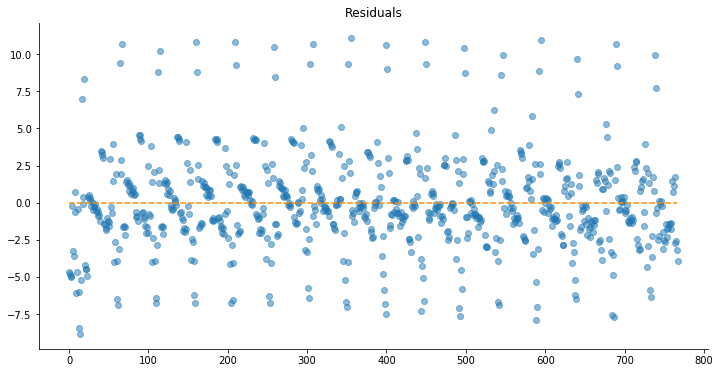

In [78]:
homoscedasticity_assumption(energy_model, data1, target1)

We can see a fully uniform variance across our residuals, so this is ok.

We can clearly see that a linear regression model on the energy efficiency dataset violates a number of assumptions which cause significant problems with the interpretation of the model itself.

 - Normality
 - Multicollinearity
 - Autocorrelation
 
It’s not uncommon for assumptions to be violated on real-world data, but it’s important to check them so we can either fix them and/or be aware of the flaws in the model for the presentation of the results or the decision making process.

It is dangerous to make decisions on a model that has violated assumptions because those decisions are effectively being formulated on made-up numbers. Not only that, but it also provides a false sense of security due to trying to be empirical in the decision making process. Empiricism requires due diligence, which is why these assumptions exist and are stated up front.

We will therefore be considering making modifications as we proceed to take into account the various violations of the assumptions

## NEXT -- Measuring Regression Performance ??